In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import string

In [2]:
attrs = ["letter", "x-box", "y-box", "width", "high", "onpix", "x-bar",
         "y-bar", "x2bar", "y2bar", "xybar", "x2ybr", "xy2br", "x-ege",
         "xegvy", "y-ege", "yegvx"]
df = pd.read_csv('data/letter-recognition.data', names = attrs)

In [3]:
df.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
df['letter'].describe()

count     20000
unique       26
top           U
freq        813
Name: letter, dtype: object

In [5]:
df['letter'].value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
Q    783
N    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
Z    734
H    734
Name: letter, dtype: int64

In [67]:
# data split
X, Y = df.iloc[:, 1:], df.iloc[:, 0]
X = StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, 
                                                    stratify = Y, shuffle = True, random_state = 8)

# KNN

In [7]:
Ks = np.arange(1, 57, 2)
Ks

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55])

In [41]:
%%time
pipe = Pipeline([('knn', KNeighborsClassifier())])

search_space = [{'knn': [KNeighborsClassifier()],
                 'knn__weights': ['uniform', 'distance'],
                 'knn__n_neighbors': Ks}
                ]

search = GridSearchCV(pipe, search_space, cv = StratifiedKFold(n_splits=5), 
                   scoring = ['accuracy'], refit=False, return_train_score=True,
                   verbose = 0, n_jobs = -1)


best_knn = search.fit(X_train, Y_train)

Wall time: 4min 32s


In [42]:
best_knn.cv_results_['params'][np.argmin(best_knn.cv_results_['rank_test_accuracy'])]

{'knn': KNeighborsClassifier(),
 'knn__n_neighbors': 3,
 'knn__weights': 'distance'}

In [79]:
knn = KNeighborsClassifier(weights = best_knn.cv_results_['params'][np.argmin(best_knn.cv_results_['rank_test_accuracy'])].get('knn__weights'),
                               n_neighbors = best_knn.cv_results_['params'][np.argmin(best_knn.cv_results_['rank_test_accuracy'])].get('knn__n_neighbors')
                              )
    
knn.fit(X_train, Y_train)
    
train_acc = accuracy_score(Y_train, knn.predict(X_train))
test_acc = accuracy_score(Y_test, knn.predict(X_test))

train_acc, test_acc

(1.0, 0.954)

C:\Users\Yuan\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0.5, 1.0, 'Confusion Matrix')

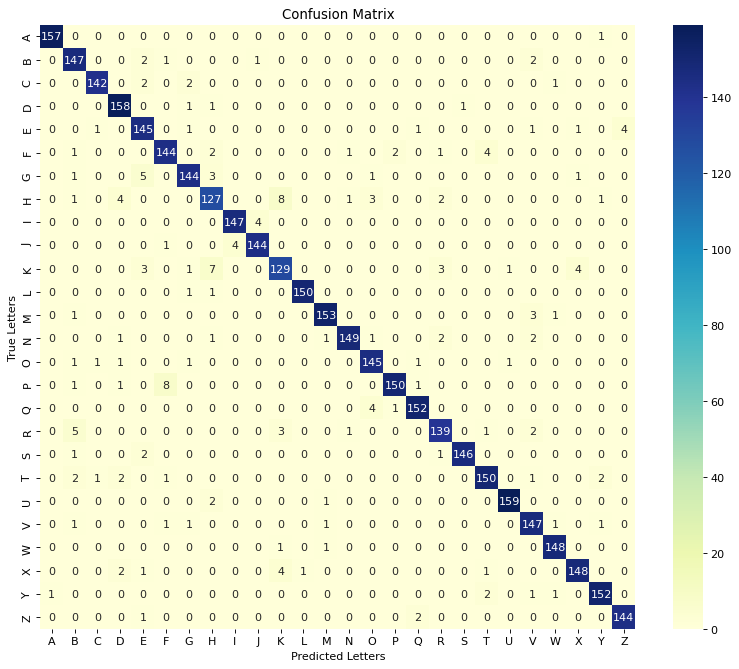

In [86]:
labels = list(string.ascii_uppercase)
con_mat = confusion_matrix(Y_test, knn.predict(X_test), labels);

f, ax = plt.subplots(figsize=(12, 10), dpi = 80)
ax = sns.heatmap(con_mat, annot=True, cmap="YlGnBu", fmt='g')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted Letters')
ax.set_ylabel('True Letters')
ax.set_title('Confusion Matrix')

In [69]:
knn = KNeighborsClassifier(weights = best_knn.cv_results_['params'][np.argmin(best_knn.cv_results_['rank_test_accuracy'])].get('knn__weights'),
                               n_neighbors = best_knn.cv_results_['params'][np.argmin(best_knn.cv_results_['rank_test_accuracy'])].get('knn__n_neighbors')
                              )
    
knn.fit(X, Y)
    
acc_all = accuracy_score(Y, knn.predict(X))

acc_all

1.0

In [44]:
best_knn.cv_results_

{'mean_fit_time': array([0.01156893, 0.01835155, 0.01835155, 0.01974769, 0.02672901,
        0.0259305 , 0.03211403, 0.02712808, 0.02892332, 0.02513313,
        0.02952104, 0.02353687, 0.02413478, 0.02553248, 0.02652802,
        0.02732668, 0.0235364 , 0.02692928, 0.03670211, 0.0311162 ,
        0.03191433, 0.0267282 , 0.0229382 , 0.02493377, 0.02413602,
        0.02493315, 0.02792506, 0.02573104, 0.02174158, 0.03350987,
        0.02413564, 0.02592988, 0.02792559, 0.02593126, 0.02812467,
        0.03849664, 0.02792568, 0.02912183, 0.02672849, 0.02453361,
        0.02273855, 0.03091707, 0.02353635, 0.02792578, 0.02613039,
        0.02393665, 0.03251395, 0.02553148, 0.03171577, 0.03450785,
        0.02613044, 0.02413416, 0.0373003 , 0.02533259, 0.0245337 ,
        0.03151555]),
 'std_fit_time': array([0.0013523 , 0.00286311, 0.00232621, 0.00074647, 0.00728498,
        0.01064833, 0.00562122, 0.00513951, 0.01123055, 0.00330205,
        0.00645141, 0.00286257, 0.0051782 , 0.00386714, 0.006

In [45]:
best_knn.cv_results_['mean_test_accuracy']

array([0.943    , 0.943    , 0.937625 , 0.944125 , 0.93575  , 0.9438125,
       0.9310625, 0.939625 , 0.928875 , 0.9378125, 0.925375 , 0.9360625,
       0.92175  , 0.932125 , 0.917    , 0.9299375, 0.9146875, 0.9275625,
       0.911125 , 0.9251875, 0.9074375, 0.922625 , 0.9035   , 0.9189375,
       0.8995   , 0.9170625, 0.8958125, 0.9143125, 0.893    , 0.9114375,
       0.891125 , 0.9095   , 0.889    , 0.9081875, 0.8841875, 0.90625  ,
       0.88125  , 0.903375 , 0.8785   , 0.9024375, 0.8745   , 0.9003125,
       0.8719375, 0.8979375, 0.8683125, 0.89625  , 0.8638125, 0.894875 ,
       0.8616875, 0.8938125, 0.858    , 0.8918125, 0.8549375, 0.8895625,
       0.851375 , 0.887375 ])

In [46]:
from scipy import stats

In [47]:
knn_3_dis = [best_knn.cv_results_['split0_test_accuracy'][3],
            best_knn.cv_results_['split1_test_accuracy'][3],
            best_knn.cv_results_['split2_test_accuracy'][3],
            best_knn.cv_results_['split3_test_accuracy'][3],
            best_knn.cv_results_['split4_test_accuracy'][3]]
knn_5_dis = [best_knn.cv_results_['split0_test_accuracy'][5],
            best_knn.cv_results_['split1_test_accuracy'][5],
            best_knn.cv_results_['split2_test_accuracy'][5],
            best_knn.cv_results_['split3_test_accuracy'][5],
            best_knn.cv_results_['split4_test_accuracy'][5]]
knn_1_uni = [best_knn.cv_results_['split0_test_accuracy'][0],
            best_knn.cv_results_['split1_test_accuracy'][0],
            best_knn.cv_results_['split2_test_accuracy'][0],
            best_knn.cv_results_['split3_test_accuracy'][0],
            best_knn.cv_results_['split4_test_accuracy'][0]]
knn_1_dis = [best_knn.cv_results_['split0_test_accuracy'][1],
            best_knn.cv_results_['split1_test_accuracy'][1],
            best_knn.cv_results_['split2_test_accuracy'][1],
            best_knn.cv_results_['split3_test_accuracy'][1],
            best_knn.cv_results_['split4_test_accuracy'][1]]
knn_7_dis = [best_knn.cv_results_['split0_test_accuracy'][7],
            best_knn.cv_results_['split1_test_accuracy'][7],
            best_knn.cv_results_['split2_test_accuracy'][7],
            best_knn.cv_results_['split3_test_accuracy'][7],
            best_knn.cv_results_['split4_test_accuracy'][7]]
knn_9_dis = [best_knn.cv_results_['split0_test_accuracy'][9],
            best_knn.cv_results_['split1_test_accuracy'][9],
            best_knn.cv_results_['split2_test_accuracy'][9],
            best_knn.cv_results_['split3_test_accuracy'][9],
            best_knn.cv_results_['split4_test_accuracy'][9]]
knn_3_uni = [best_knn.cv_results_['split0_test_accuracy'][2],
            best_knn.cv_results_['split1_test_accuracy'][2],
            best_knn.cv_results_['split2_test_accuracy'][2],
            best_knn.cv_results_['split3_test_accuracy'][2],
            best_knn.cv_results_['split4_test_accuracy'][2]]
knn_11_dis = [best_knn.cv_results_['split0_test_accuracy'][11],
            best_knn.cv_results_['split1_test_accuracy'][11],
            best_knn.cv_results_['split2_test_accuracy'][11],
            best_knn.cv_results_['split3_test_accuracy'][11],
            best_knn.cv_results_['split4_test_accuracy'][11]]


print(stats.ttest_rel(knn_3_dis, knn_5_dis))
print(stats.ttest_rel(knn_3_dis, knn_1_uni))
print(stats.ttest_rel(knn_3_dis, knn_1_dis))
print(stats.ttest_rel(knn_3_dis, knn_7_dis))
print(stats.ttest_rel(knn_3_dis, knn_9_dis))
print(stats.ttest_rel(knn_3_dis, knn_3_uni))
print(stats.ttest_rel(knn_3_dis, knn_11_dis))

Ttest_relResult(statistic=0.13399000471846054, pvalue=0.8998816031877218)
Ttest_relResult(statistic=1.1239029738980424, pvalue=0.3239408309918392)
Ttest_relResult(statistic=1.1239029738980424, pvalue=0.3239408309918392)
Ttest_relResult(statistic=2.0600879450604817, pvalue=0.1084417252058543)
Ttest_relResult(statistic=2.3882341356811163, pvalue=0.075312103977401)
Ttest_relResult(statistic=4.952380952380949, pvalue=0.007748043629007714)
Ttest_relResult(statistic=3.10956239179223, pvalue=0.035887092316604155)


In [48]:
d = {'Model': ['k=3 distance', 'k=5 distance','k=1 uniform','k=1 distance',
             'k=7 distance', 'k=9 distance', 'k=3 uniform', 'k=11 distance'],
    'P value': [stats.ttest_rel(knn_3_dis, knn_3_dis)[1],
                 stats.ttest_rel(knn_3_dis, knn_5_dis)[1],
                 stats.ttest_rel(knn_3_dis, knn_1_uni)[1],
                 stats.ttest_rel(knn_3_dis, knn_1_dis)[1],
                 stats.ttest_rel(knn_3_dis, knn_7_dis)[1],
                 stats.ttest_rel(knn_3_dis, knn_9_dis)[1],
                 stats.ttest_rel(knn_3_dis, knn_3_uni)[1],
                 stats.ttest_rel(knn_3_dis, knn_11_dis)[1]]}
df_t_test = pd.DataFrame(d)
df_t_test

,Model,P value
0,k=3 distance,NaN
1,k=5 distance,0.899882
2,k=1 uniform,0.323941
3,k=1 distance,0.323941
4,k=7 distance,0.108442
5,k=9 distance,0.075312
6,k=3 uniform,0.007748
7,k=11 distance,0.035887


## K=3 uniform and K=11 distance is significantly different from the best model, k=3 distance. 

In [49]:
best_knn.cv_results_['mean_test_accuracy']

array([0.943    , 0.943    , 0.937625 , 0.944125 , 0.93575  , 0.9438125,
       0.9310625, 0.939625 , 0.928875 , 0.9378125, 0.925375 , 0.9360625,
       0.92175  , 0.932125 , 0.917    , 0.9299375, 0.9146875, 0.9275625,
       0.911125 , 0.9251875, 0.9074375, 0.922625 , 0.9035   , 0.9189375,
       0.8995   , 0.9170625, 0.8958125, 0.9143125, 0.893    , 0.9114375,
       0.891125 , 0.9095   , 0.889    , 0.9081875, 0.8841875, 0.90625  ,
       0.88125  , 0.903375 , 0.8785   , 0.9024375, 0.8745   , 0.9003125,
       0.8719375, 0.8979375, 0.8683125, 0.89625  , 0.8638125, 0.894875 ,
       0.8616875, 0.8938125, 0.858    , 0.8918125, 0.8549375, 0.8895625,
       0.851375 , 0.887375 ])

In [50]:
best_knn.cv_results_

{'mean_fit_time': array([0.01156893, 0.01835155, 0.01835155, 0.01974769, 0.02672901,
        0.0259305 , 0.03211403, 0.02712808, 0.02892332, 0.02513313,
        0.02952104, 0.02353687, 0.02413478, 0.02553248, 0.02652802,
        0.02732668, 0.0235364 , 0.02692928, 0.03670211, 0.0311162 ,
        0.03191433, 0.0267282 , 0.0229382 , 0.02493377, 0.02413602,
        0.02493315, 0.02792506, 0.02573104, 0.02174158, 0.03350987,
        0.02413564, 0.02592988, 0.02792559, 0.02593126, 0.02812467,
        0.03849664, 0.02792568, 0.02912183, 0.02672849, 0.02453361,
        0.02273855, 0.03091707, 0.02353635, 0.02792578, 0.02613039,
        0.02393665, 0.03251395, 0.02553148, 0.03171577, 0.03450785,
        0.02613044, 0.02413416, 0.0373003 , 0.02533259, 0.0245337 ,
        0.03151555]),
 'std_fit_time': array([0.0013523 , 0.00286311, 0.00232621, 0.00074647, 0.00728498,
        0.01064833, 0.00562122, 0.00513951, 0.01123055, 0.00330205,
        0.00645141, 0.00286257, 0.0051782 , 0.00386714, 0.006

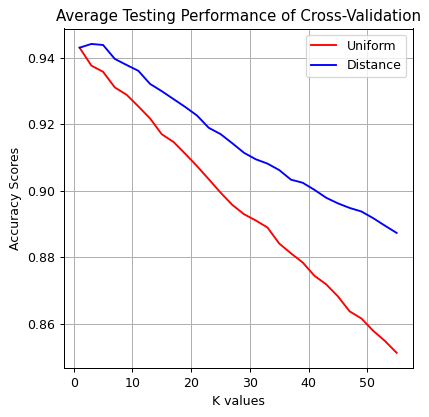

In [55]:
uni_avg_acc = []
dis_avg_acc = []

for i in np.arange(0, 56, 2):
    uni_avg_acc.append(best_knn.cv_results_['mean_test_accuracy'][i])

for i in np.arange(1, 56, 2):
    dis_avg_acc.append(best_knn.cv_results_['mean_test_accuracy'][i])
    
x_axis = np.arange(1, 56, 2)

fig = plt.figure(figsize = (5, 5), dpi = 90)
uni, = plt.plot(x_axis, uni_avg_acc, 'r-', label = 'Uniform')
dis, = plt.plot(x_axis, dis_avg_acc, 'b-', label = 'Distance')
plt.xlabel('K values')
plt.ylabel('Accuracy Scores')
plt.title('Average Testing Performance of Cross-Validation')
plt.grid(True)
plt.legend()

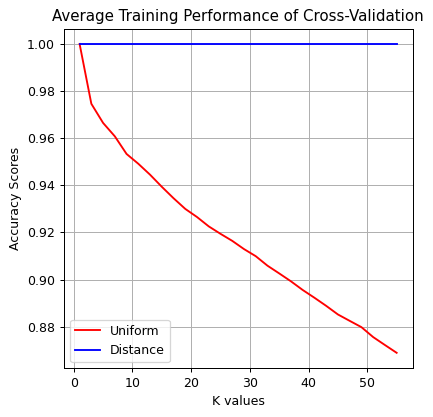

In [56]:
uni_avg_acc_tr = []
dis_avg_acc_tr = []

for i in np.arange(0, 56, 2):
    uni_avg_acc_tr.append(best_knn.cv_results_['mean_train_accuracy'][i])

for i in np.arange(1, 56, 2):
    dis_avg_acc_tr.append(best_knn.cv_results_['mean_train_accuracy'][i])
    
x_axis = np.arange(1, 56, 2)

fig = plt.figure(figsize = (5, 5), dpi = 90)
uni, = plt.plot(x_axis, uni_avg_acc_tr, 'r-', label = 'Uniform')
dis, = plt.plot(x_axis, dis_avg_acc_tr, 'b-', label = 'Distance')
plt.xlabel('K values')
plt.ylabel('Accuracy Scores')
plt.title('Average Training Performance of Cross-Validation')
plt.grid(True)
plt.legend()

In [61]:
for i in range(28):
    if uni_avg_acc[i] < uni_avg_acc_tr[i]:
        print('True')
    else:
        print('False')

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [62]:
for i in range(28):
    if dis_avg_acc[i] < dis_avg_acc_tr[i]:
        print('True')
    else:
        print('False')

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [64]:
dis_avg_acc, uni_avg_acc

([0.943,
  0.944125,
  0.9438124999999999,
  0.939625,
  0.9378125,
  0.9360625,
  0.9321250000000001,
  0.9299375,
  0.9275625,
  0.9251875,
  0.922625,
  0.9189375,
  0.9170624999999999,
  0.9143125,
  0.9114374999999999,
  0.9094999999999999,
  0.9081875,
  0.90625,
  0.9033749999999999,
  0.9024375000000001,
  0.9003125000000001,
  0.8979374999999999,
  0.8962499999999999,
  0.8948750000000001,
  0.8938125000000001,
  0.8918125,
  0.8895624999999999,
  0.8873749999999999],
 [0.943,
  0.937625,
  0.93575,
  0.9310625,
  0.928875,
  0.9253750000000001,
  0.92175,
  0.917,
  0.9146875000000001,
  0.911125,
  0.9074375,
  0.9035,
  0.8995000000000001,
  0.8958124999999999,
  0.893,
  0.8911250000000001,
  0.889,
  0.8841875,
  0.88125,
  0.8785000000000001,
  0.8744999999999999,
  0.8719375000000001,
  0.8683125,
  0.8638125000000001,
  0.8616875,
  0.858,
  0.8549374999999999,
  0.851375])